In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import bernoulli

In [23]:
df = pd.read_csv('./data/train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Columns to generate:
- Survived
- Age
- SibSp
- Parch
- Fare
- Sex
- Pclass
- Embarked

### Generating Pclass:

In [43]:
df['Pclass'].value_counts() / len(df)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

We see that about 55.1% of passengers were class 3, 24.24% of passengers were class 1, and 20.65% were class 2.

### Data Generating Process for Assigning Pclass:
- Let $X\sim N(0.24, 0.05)$ and $Y\sim N(0.206, 0.05)$
- $\left \lfloor{891*X}\right \rfloor$ will be the number of passengers in Pclass1 and $\left \lfloor{891*Y}\right \rfloor$ be the number of passengers in Pclass2
- $891 - \left \lfloor{891*X}\right \rfloor - \left \lfloor{891*Y}\right \rfloor$ will be the remaining in Pclass3.

# Joint distributions?

In [59]:
num_pclass1 = math.floor(np.random.normal(0.24, 0.05) * 891)
num_pclass2 = math.floor(np.random.normal(0.206, 0.05) * 891)
num_pclass3 = 891 - num_pclass1 - num_pclass2

In [ ]:
np.zeros(20, dtype=int)
K[:10] = 1
np.random.shuffle(K)
print(K)

In [67]:
x = np.zeros(5)

In [88]:
df.loc[df['Pclass'] == 1]['Sex'].value_counts()

male      122
female     94
Name: Sex, dtype: int64

In [89]:
df.loc[df['Pclass'] == 2]['Sex'].value_counts()

male      108
female     76
Name: Sex, dtype: int64

In [90]:
df.loc[df['Pclass'] == 3]['Sex'].value_counts()

male      347
female    144
Name: Sex, dtype: int64

In [28]:
number_passengers = len(df)

In [29]:
df.groupby('Pclass').agg({'Survived': lambda x: sum(x) / len(x)})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [34]:
df.groupby('Sex').agg({'Survived': lambda x: sum(x) / len(x)})

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
plt.plot(df)

In [26]:
bernoulli.rvs(size=5, p=0.8)

array([0, 1, 1, 0, 1])

In [4]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

---

In [27]:
df_generated = pd.read_csv('./data/generated_data/generated_dataset0')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

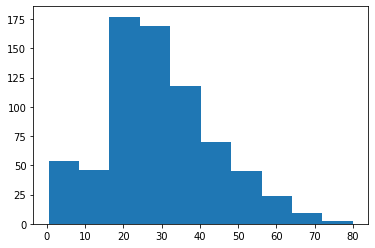

In [28]:
plt.hist(df['Age'])

(array([ 16.,  17., 100., 144., 277.,  58.,  52.,  30.,  16.,   9.]),
 array([ 0.42 ,  7.138, 13.856, 20.574, 27.292, 34.01 , 40.728, 47.446,
        54.164, 60.882, 67.6  ]),
 <BarContainer object of 10 artists>)

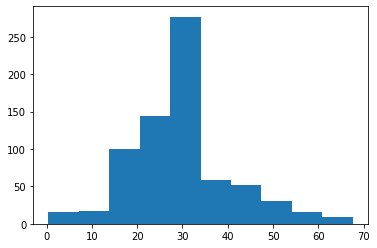

In [29]:
plt.hist(df_generated['Age'])

In [19]:
df_generated.loc[df_generated['Pclass'] == 1]['Sex'].value_counts()

male      111
female     55
Name: Sex, dtype: int64

In [20]:
df_generated.loc[df_generated['Pclass'] == 2]['Sex'].value_counts()

male      133
female     68
Name: Sex, dtype: int64

In [21]:
df_generated.loc[df_generated['Pclass'] == 3]['Sex'].value_counts()

male      345
female    179
Name: Sex, dtype: int64

In [22]:
df_generated

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,58,0,2,"Meanwell, Miss. (Marion Ogden)",female,18.51,0,0,349247,65.9621,NaN,Q
1,1,427,1,2,"Panula, Master. Eino Viljami",female,30.63,0,0,2003,8.6277,B78,S
2,2,353,1,1,"Davies, Mr. Charles Henry",female,29.97,0,0,29104,67.7694,NaN,S
3,3,674,0,3,"Kenyon, Mrs. Frederick R (Marion)",male,28.53,5,0,36973,10.6549,NaN,C
4,4,1,0,2,"Baclini, Miss. Helene Barbara",male,29.68,0,1,237442,7.2768,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,1,0,3,"Moutal, Mr. Rahamin Haim",male,22.13,1,0,19950,18.0887,NaN,C
887,887,12,0,1,"Slemen, Mr. Richard James",male,27.40,0,0,2647,33.2763,NaN,C
888,888,139,1,3,"Johanson, Mr. Jakob Alfred",male,29.03,1,0,C.A. 17248,17.1817,C78,Q
889,889,47,1,3,"Graham, Miss. Margaret Edith",female,52.85,0,0,PC 17595,49.7834,NaN,S
